# Lab 13 - Clustering I: K Means
#### Name: Jake Schaeffer
#### Class: CSCI 349 - Intro to Data Mining
#### Semester: Spring 2020
#### Instructor: Brian King

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score,homogeneity_completeness_v_measure

#### 1) [P] Copy the following code to build a very basic set of clustered data using the make_blobs function in sklearn.datasets.samples_generator

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=60, centers=5,
            cluster_std=(0.3,0.4,0.5,0.7,0.7),
        center_box=(0, 8), random_state=1234)

#### 2) [P] Convert your data into a single pandas data frame with three variables, "x1", "x2", and "target". 
The
variable "target" will represent our ground truth, i.e. the correct cluster class. Be sure it is a true
categorical variable. Show the first 5 observations, which should have two numeric variables, named "x" and
"y", and one category, named "target".

In [4]:
df = pd.DataFrame(X.tolist(), columns = ["x","y"])
#x1, x2, target = 
df["target"] = pd.Categorical(y_true)
df.head()

,x,y,target
0,3.920853,6.701244,1
1,7.349579,7.531876,4
2,2.415558,6.811551,3
3,1.471362,4.780079,0
4,2.536789,3.920516,3


#### 3) [P] Show the info() and a table of the counts of the "target" variable (you should have the same number of observations for each label)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
x         60 non-null float64
y         60 non-null float64
target    60 non-null category
dtypes: category(1), float64(2)
memory usage: 1.3 KB


In [6]:
df.groupby("target").count()

,x,y
target,,
0,12,12
1,12,12
2,12,12
3,12,12
4,12,12


#### 4) [P] Create a scatterplot of the data, using the target variable to color each cluster. You should have five colored clusters. Two classes should stand out as quite separate. Three will have some minor overlap.

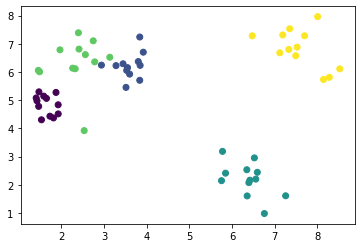

In [7]:
plt.scatter(df.x,df.y,c=df.target)

#### 5) [P] Read the reference for KMeans. Now, create a clustering using KMeans. Let's assume you have prior knowledge that there are indeed 5clusters, but you aren't aware of ground truth. Thus, you can only assess the SSE and silhouette coefficient for your clustering.

Print the inertia_ (SSE) and the silhouette_score results for this clustering.

In [8]:
kmeanStuff = KMeans(5).fit(X)
print("SSE(Inertia) : ",kmeanStuff.inertia_)
print("Silhouette score: ",silhouette_score(X,kmeanStuff.labels_))

SSE(Inertia) :  25.674698692870933
Silhouette score:  0.6193221245493099


#### 6) [P] Generate a scatterplot again, however, now color the points based off of the labels generated by the clustering, and NOT the correct labels
Add the centroids using a distinguishing color and size with an
alpha=0.5.


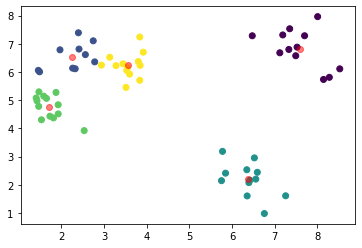

In [9]:
def plotKMeans(X,numCluster):
    kmeanStuff = KMeans(numCluster).fit(X)
    plt.scatter(df.x,df.y,c=kmeanStuff.labels_)
    centroids = pd.DataFrame(kmeanStuff.cluster_centers_.tolist(), columns = ["x","y"])
    plt.scatter(centroids.x,centroids.y,c = "red",alpha = .5)
    plt.show()
plotKMeans(X,5)

#### 7) [P] Generate the same plots with a KMeans clustering with k=3 and k=4. You'll need this to explain your next steps.

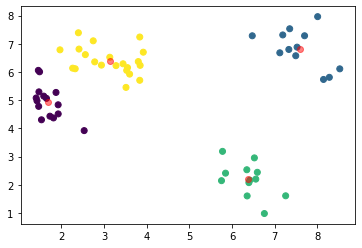

In [10]:
plotKMeans(X,4)

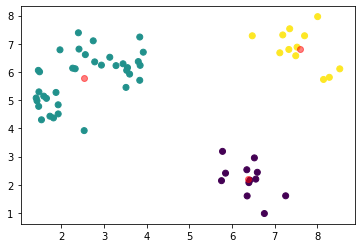

In [11]:
plotKMeans(X,3)

#### 8) [P] Let's take a step backward and assume that you are uncertain about how many actual clusters you have.
Evaluate cluster sizes from 2 through 10. Create a data frame that stores the SSE and the silhouette score for
each k. Show the resulting data frame.

In [12]:
kmScores = pd.DataFrame(index = [i for i in range(2,11)],columns = ["SSE (Inertia)", "Silhouette Score"])
for i in range(2,11):
    kms = KMeans(i).fit(X)
    kmScores.at[i,"SSE (Inertia)"] = kms.inertia_ #SSE
    kmScores.at[i,"Silhouette Score"] = silhouette_score(X,kms.labels_)
kmScores

,SSE (Inertia),Silhouette Score
2,208.38,0.591168
3,70.4956,0.716448
4,33.5804,0.653255
5,25.6747,0.619322
6,20.0225,0.587421
7,16.8359,0.519022
8,14.1487,0.468039
9,12.9121,0.437714
10,11.7654,0.405661


#### 9) [P] Show the elbow plot (i.e. a line plot) of both measures on separate graphs. Use k as the x axis.

SSE


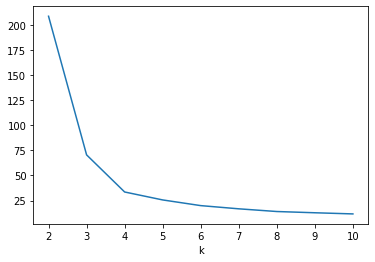

Silhouette Score


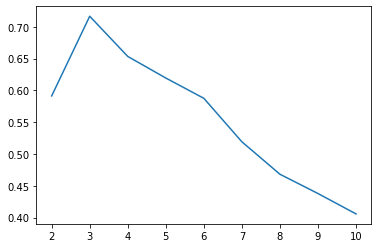

In [13]:
print("SSE")
plt.plot(kmScores.index,kmScores.iloc[:,0])
plt.xlabel("k")
plt.show()
print("Silhouette Score")
plt.plot(kmScores.index,kmScores.iloc[:,1])
plt.show()
#plt.figure(figsize = (12,6))

#### 10) [M] What does the SSE suggest is the best value of k? What about the silhouette coefficient? 
Refer to your
three plots above to help you explain what happened. Why do you think there are these discrepancies?
(If you have the interest, you should go back and regenerate your data with much smaller cluster_std values...
and you'll see much more consistent results! That tells you something about how well these techniques work
when your data are not linearly separable, and when your clusters are not all equally distributed.)

the SSE suggests that the best value of k is 3 or 4 because that is where to elbow is. this means that the amount closer we can get points to a centroid will no longer increase  a lot if we add another centroid. The silhoutte coefficient is best when k is 3, and second best at 4. The reason these metrics show that 3 is better than any other value is because there are three distinct collections of points when looking at the graph visually. When the clusters are closer together, they have a better defined space. In the example with 5 blobs, the 3 are so close together that the metrics show 3 clusters to be the best way of categorizing, even though the actual number is 5.

#### 11) [P] Now, re-generate your clustering for k=5. You will likely notice that your labels will be different colors than
your original labels. That's annoying. Write the code to remap your cluster labels to use the same order as
your labels as your ground truth. And, re-generate the correct plot, AND the clustered plot. This will make it
easier to distinguish the observations that have different labels between the plots.
(HINT: How? Perhaps the easiest approach is to use the contingency_matrix function in
sklearn.metrics.cluster package. Show the output of that, then think about how you can use that to
get the best mapping.)
If you do it correctly, you should have two plots that look very, very similar:

Your plots might be slightly different, but you should see at least a couple of points that were partitioned into
the wrong cluster.

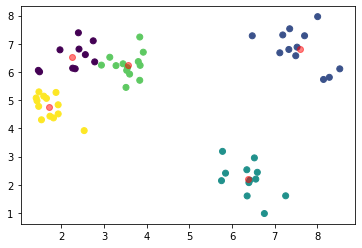

In [130]:
plotKMeans(X,5)

#### 12) Re-generate your two plots above into a single plot that clearly highlights every point that has been assigned
to an incorrect correct cluster. For example, here is one approach you could use:

#### 13) [M] Since we do have ground truth, there are several metrics that are used to assess the quality of your
clustering. Read the section on clustering performance evaluation in Scikit-learn's documentation page:
https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation
Pay close attention to the following: Adjusted Rand Index, Homogeneity, Completeness, and V-measure. In
this section, very briefly describe each of these four measures. Though we did not explicitly cover them in
class, these are good to know.

#### 14) [P] Create a new data frame that contains these four measures for all KMeans clusterings of k between 2-10.
As before, show your data frame, then generate a plot for each. However, since each of these falls on the
same scale, you could generate them on one plot, or show them as subplots.

#### 15) [P] OPTIONAL – A benchmark dataset has been going around called the diamonds dataset. It's a rich dataset
of 53940 rows over 10 variables. Each row represents various characteristics of diamonds. The primary
motivation of these data is to challenge the machine learning community to predict the price of a diamond,
based on the other 9 characteristics.
Load in the data as follows:
df_diamonds = sns.load_dataset("diamonds")
This page has good info about the variables: https://www.kaggle.com/shivam2503/diamonds
Your aim right now is to simply assess the following - are there any natural clusterings of these data? If so,
over which variables? How many clusters? (NOTE: If you are computing the silhouette over many values of k,
this could take a bit of time.)
(NOTE: don't spend too much time on this yet. The next lab will repeat this question, but allow you to use
Hierarchical Agglomerative clustering to help you answer the question.)